In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
np.random.seed(10)

= Exercice 2

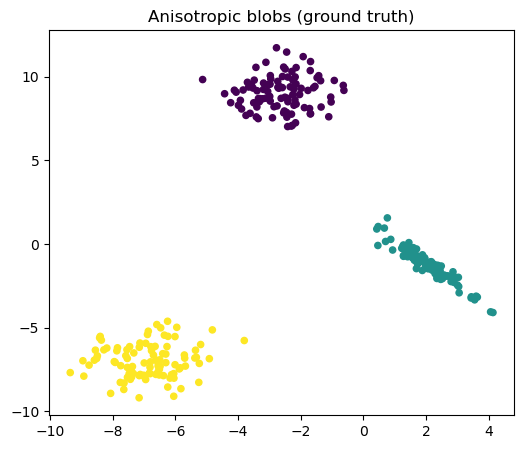

In [5]:
X_blobs, y_blobs = make_blobs(n_samples=300, centers=3, 
                               cluster_std=1.0, random_state=42)


transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = X_blobs.copy()
mask = (y_blobs == 1)
X_aniso[mask] = X_aniso[mask] @ transformation

plt.figure(figsize=(6, 5))
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_blobs, 
            cmap='viridis', s=20)
plt.title("Anisotropic blobs (ground truth)")
plt.show()


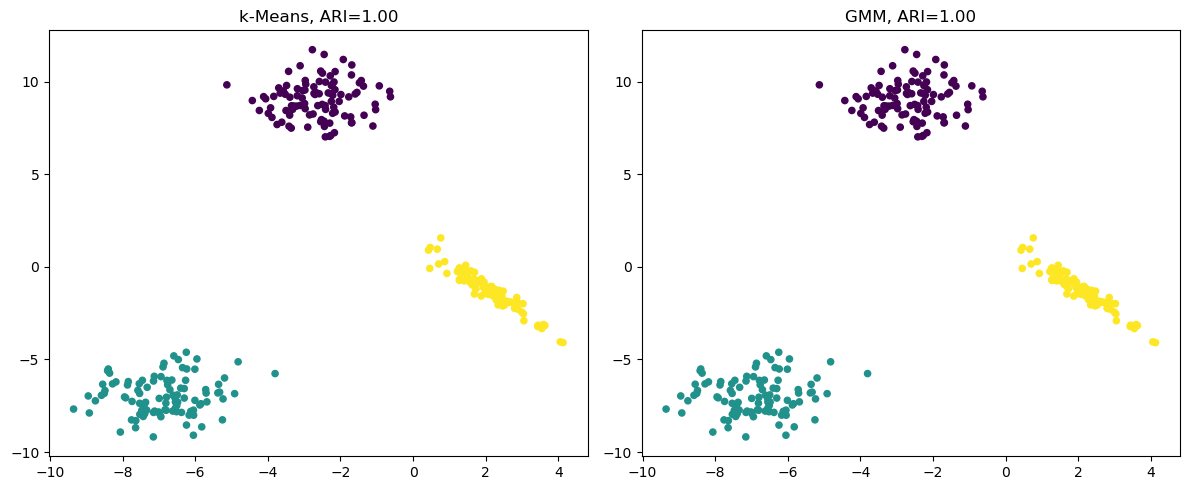

In [6]:
gmm = GaussianMixture(n_components=3, covariance_type='full', 
                       random_state=42)
labels_gmm = gmm.fit_predict(X_aniso)

km_aniso = KMeans(n_clusters=3, random_state=42).fit_predict(X_aniso)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].scatter(X_aniso[:, 0], X_aniso[:, 1], c=km_aniso, 
                cmap='viridis', s=20)
axes[0].set_title(f"k-Means, ARI={adjusted_rand_score(y_blobs, km_aniso):.2f}")

axes[1].scatter(X_aniso[:, 0], X_aniso[:, 1], c=labels_gmm, 
                cmap='viridis', s=20)
axes[1].set_title(f"GMM, ARI={adjusted_rand_score(y_blobs, labels_gmm):.2f}")
plt.tight_layout(); plt.show()


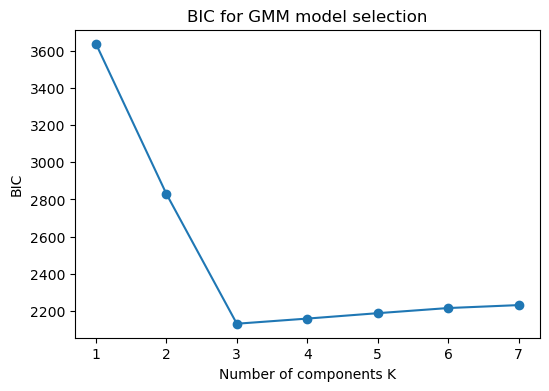

Optimal K by BIC: 3


In [7]:
bics = []
Ks = range(1, 8)
for K in Ks:
    g = GaussianMixture(n_components=K, covariance_type='full', 
                         random_state=42)
    g.fit(X_aniso)
    bics.append(g.bic(X_aniso))

plt.figure(figsize=(6, 4))
plt.plot(Ks, bics, 'o-')
plt.xlabel("Number of components K")
plt.ylabel("BIC")
plt.title("BIC for GMM model selection")
plt.show()
print(f"Optimal K by BIC: {list(Ks)[np.argmin(bics)]}")
